<a href="https://colab.research.google.com/github/89CANDY89/ULTIMA/blob/main/M6_S5_PROJETO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**negrito**\## Importe o pandas, seaborn e matplotlib

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd




# Carregue os dados do arquivo CSV
url = '/content/QVI_transaction_data.csv'
df_gasto = pd.read_csv(url)

## ImpUT


In [4]:
# Crie a tabela com total de casos e mortes por país
df_gasto.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


##3. Quem gasta mais em chips (vendas totais) por estágio de vida:






PROD_QTY
2      1811775.20
1       102220.00
5         8183.15
4         5976.60
3         4960.05
200       1300.00
Name: TOT_SALES, dtype: float64


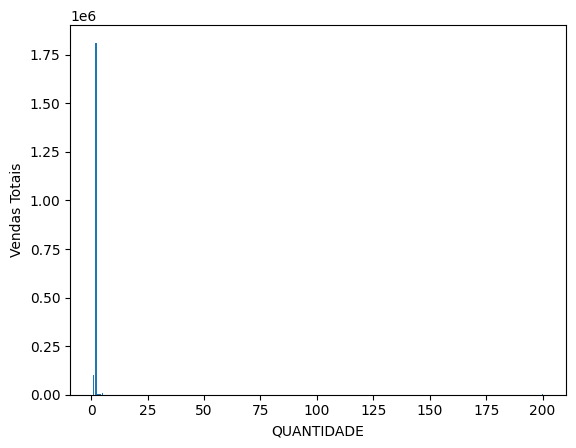

In [7]:
# Agrupar por estágio de vida e calcular as vendas totais
df_gasto_total = df_gasto.groupby("PROD_QTY")["TOT_SALES"].sum()

# Visualizar os resultados
print(df_gasto_total.sort_values(ascending=False))

# Opcional: Criar um gráfico de barras
plt.bar(df_gasto_total.index, df_gasto_total)
plt.xlabel("QUANTIDADE")
plt.ylabel("Vendas Totais")
plt.show()

##4. Número de clientes em cada segmento:



> Bloco com recuo





PROD_NBR
1      1489
2      3159
3      3219
4      3185
5      1468
       ... 
110    1495
111    1614
112    3268
113    3170
114    3127
Length: 114, dtype: int64


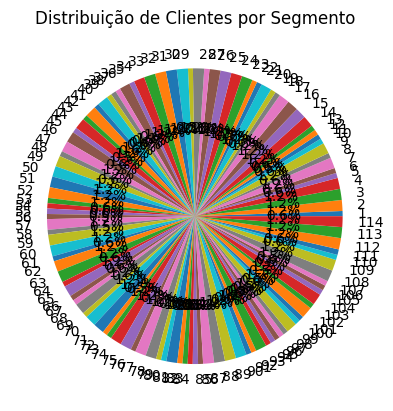

In [8]:
# Contar o número de clientes em cada segmento
df_clientes_segmento = df_gasto.groupby("PROD_NBR").size()

# Visualizar os resultados
print(df_clientes_segmento)

# Opcional: Criar um gráfico de pizza
plt.pie(df_clientes_segmento, labels=df_clientes_segmento.index, autopct='%1.1f%%')
plt.title("Distribuição de Clientes por Segmento")
plt.show()


##5. Quantidade de chips comprados por cliente por segmento:





PROD_NBR
1       5.457220
2       7.263185
3       8.794160
4      12.669388
5       5.675068
         ...    
110     3.590301
111     5.659851
112     8.001591
113     8.786435
114     8.816054
Name: TOT_SALES, Length: 114, dtype: float64


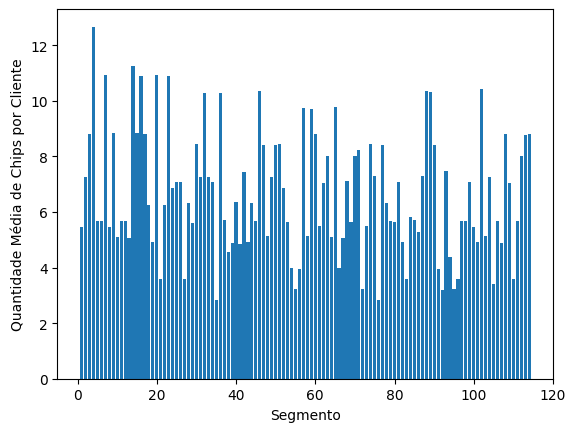

In [9]:
# Calcular a quantidade média de chips comprados por cliente por segmento
df_chips_cliente_segmento = df_gasto.groupby("PROD_NBR")["TOT_SALES"].mean()

# Visualizar os resultados
print(df_chips_cliente_segmento)

# Opcional: Criar um gráfico de barras
plt.bar(df_chips_cliente_segmento.index, df_chips_cliente_segmento)
plt.xlabel("Segmento")
plt.ylabel("Quantidade Média de Chips por Cliente")
plt.show()

## 6. Preço médio do chip por segmento de cliente:





DATE
2018-07-01    58.098066
2018-07-02    56.541491
2018-07-03    57.781163
2018-07-04    56.521008
2018-07-05    59.362360
                ...    
2019-06-26    55.954357
2019-06-27    55.959097
2019-06-28    57.469863
2019-06-29    54.080537
2019-06-30    57.213710
Name: PROD_NBR, Length: 364, dtype: float64


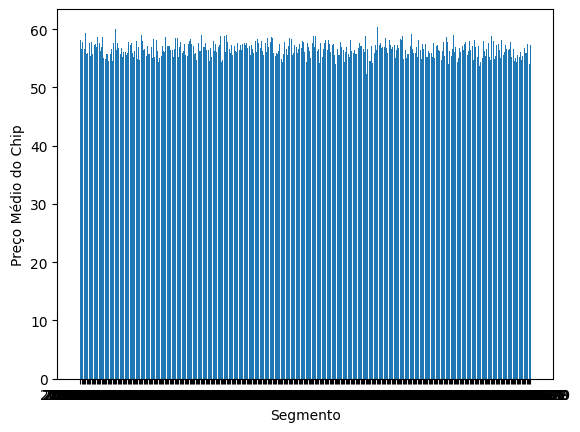

In [11]:
# Calcular o preço médio do chip por segmento de cliente
df_preco_medio_segmento = df_gasto.groupby("DATE")["PROD_NBR"].mean()

# Visualizar os resultados
print(df_preco_medio_segmento)

# Opcional: Criar um gráfico de barras
plt.bar(df_preco_medio_segmento.index, df_preco_medio_segmento)
plt.xlabel("Segmento")
plt.ylabel("Preço Médio do Chip")
plt.show()
